In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.makedirs('outputs',exist_ok=True)

#Load Dataset


In [23]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index (1).csv
Saving historical_data.csv to historical_data (1).csv


In [24]:
sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

sentiment_df.head(),trader_df.head()

(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

#cleaning


In [25]:
trader_df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [26]:
sentiment_df.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [27]:
trader_df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [28]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

trader_df = trader_df.dropna(subset=['Timestamp IST'])

trader_df.reset_index(drop=True, inplace=True)

trader_df.info(), sentiment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79225 entries, 0 to 79224
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           79225 non-null  object        
 1   Coin              79225 non-null  object        
 2   Execution Price   79225 non-null  float64       
 3   Size Tokens       79225 non-null  float64       
 4   Size USD          79225 non-null  float64       
 5   Side              79225 non-null  object        
 6   Timestamp IST     79225 non-null  datetime64[ns]
 7   Start Position    79225 non-null  float64       
 8   Direction         79225 non-null  object        
 9   Closed PnL        79225 non-null  float64       
 10  Transaction Hash  79225 non-null  object        
 11  Order ID          79225 non-null  int64         
 12  Crossed           79225 non-null  bool          
 13  Fee               79225 non-null  float64       
 14  Trade ID          7922

(None, None)

#Merge Both Dataset

In [29]:
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date
trader_df['trade_date'] = pd.to_datetime(trader_df['trade_date'])


In [30]:
sentiment_small = sentiment_df[['date', 'value', 'classification']]


In [31]:
merged_df = pd.merge(
    trader_df,
    sentiment_small,
    left_on='trade_date',
    right_on='date',
    how='left'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,2024-02-12,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,2024-02-12,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,2024-02-12,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,2024-02-12,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,2024-02-12,70.0,Greed


In [32]:
merged_df['classification'].value_counts(dropna=False)


,count
classification,
NaN,43361
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


#Simple summary


In [40]:
#trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date
#trader_df['trade_date'] = pd.to_datetime(trader_df['trade_date'])

#sentiment_small = sentiment_df[['date', 'value', 'classification']]

#merged_df = pd.merge(
    #trader_df,
    #sentiment_small,
    #left_on='trade_date',
    #right_on='date',
    #how='left'
#)

#print(merged_df[['trade_date', 'Coin', 'Closed PnL', 'classification']].head())


  trade_date  Coin  Closed PnL classification
0 2024-02-12  @107         0.0          Greed
1 2024-02-12  @107         0.0          Greed
2 2024-02-12  @107         0.0          Greed
3 2024-02-12  @107         0.0          Greed
4 2024-02-12  @107         0.0          Greed


In [47]:
# 1) Daily metrics banao (per date + sentiment)
daily_metrics = merged_df.groupby(['trade_date', 'classification']).agg(
    total_trades=('Account', 'count'),
    total_volume_usd=('Size USD', 'sum'),
    avg_trade_size_usd=('Size USD', 'mean'),
    avg_pnl=('Closed PnL', 'mean'),
    total_pnl=('Closed PnL', 'sum')
).reset_index()

daily_metrics.head()


,trade_date,classification,total_trades,total_volume_usd,avg_trade_size_usd,avg_pnl,total_pnl
0,2023-01-05,Fear,3,477.00,159.000000,0.000000,0.000000
1,2023-05-12,Neutral,9,50005.83,5556.203333,0.000000,0.000000
2,2024-01-01,Greed,18,264239.53,14679.973889,-7.196192,-129.531460
3,2024-01-02,Greed,6,2008.18,334.696667,0.000000,0.000000
4,2024-01-03,Greed,137,472974.70,3452.370073,60.176945,8244.241409


In [48]:
# 2) Ab classification-wise summary (Fear vs Greed comparison)
summary = daily_metrics.groupby('classification').agg(
    avg_daily_volume=('total_volume_usd', 'mean'),
    avg_daily_pnl=('avg_pnl', 'mean'),
    avg_daily_trades=('total_trades', 'mean'),
    avg_trade_size=('avg_trade_size_usd', 'mean'),
    total_pnl=('total_pnl', 'sum')
)

summary


,avg_daily_volume,avg_daily_pnl,avg_daily_trades,avg_trade_size,total_pnl
classification,,,,,
Extreme Fear,1.596707e+06,8.951448,387.666667,2191.149008,4.399937e+03
Extreme Greed,4.238084e+05,46.834938,130.720930,7954.335976,1.156894e+06
Fear,2.153362e+06,56.312059,374.837838,6014.623918,1.779226e+06
Greed,1.018675e+06,29.148125,201.642857,6352.086535,6.096325e+05
Neutral,7.462220e+05,28.283112,172.250000,7191.752725,7.465674e+04


#Graphs

<Figure size 800x500 with 0 Axes>

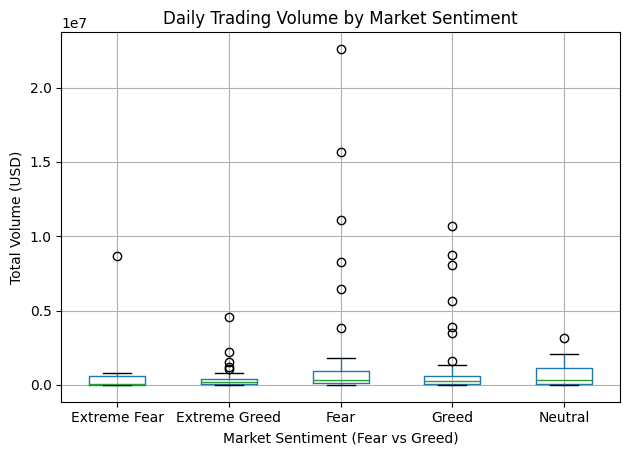

In [53]:
plt.figure(figsize=(8, 5))
daily_metrics.boxplot(column='total_volume_usd', by='classification')
plt.title('Daily Trading Volume by Market Sentiment')
plt.suptitle('')  # extra title hata deta hai
plt.xlabel('Market Sentiment (Fear vs Greed)')
plt.ylabel('Total Volume (USD)')
plt.tight_layout()

# save
plt.savefig('outputs/daily_volume_by_sentiment.png', bbox_inches='tight')
plt.show()

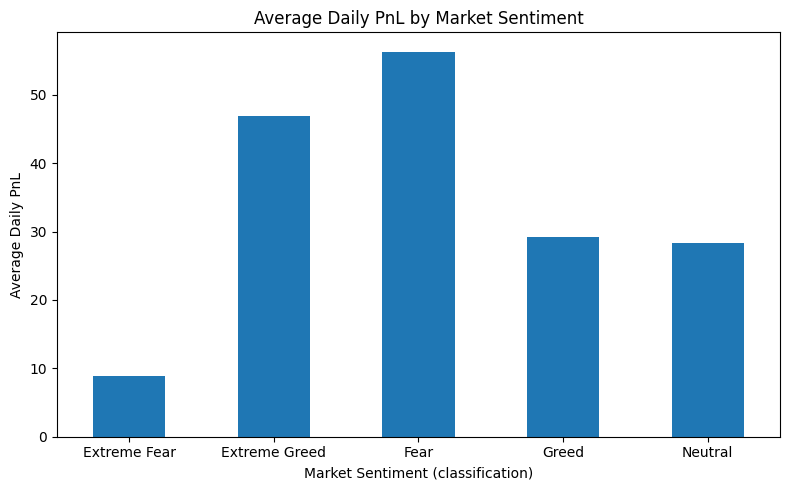

In [54]:
plt.figure(figsize=(8, 5))
summary['avg_daily_pnl'].plot(kind='bar')
plt.title('Average Daily PnL by Market Sentiment')
plt.xlabel('Market Sentiment (classification)')
plt.ylabel('Average Daily PnL')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('outputs/avg_daily_pnl_by_sentiment.png', bbox_inches='tight')
plt.show()


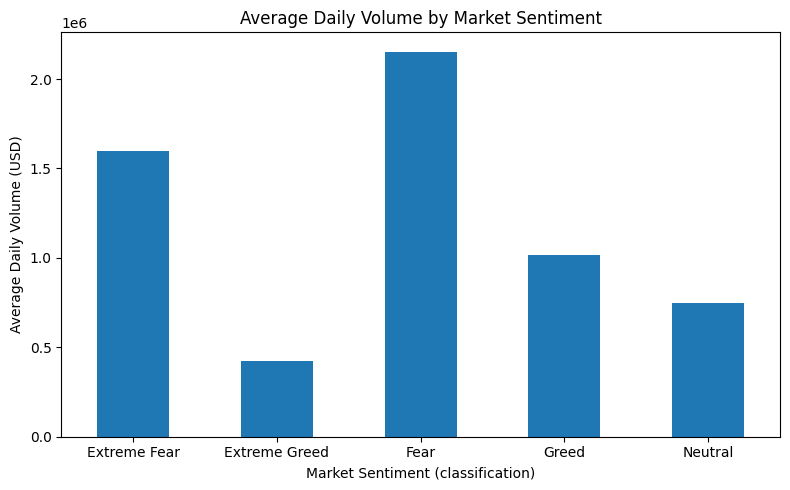

In [55]:
plt.figure(figsize=(8, 5))
summary['avg_daily_volume'].plot(kind='bar')
plt.title('Average Daily Volume by Market Sentiment')
plt.xlabel('Market Sentiment (classification)')
plt.ylabel('Average Daily Volume (USD)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('outputs/avg_daily_volume_by_sentiment.png', bbox_inches='tight')
plt.show()


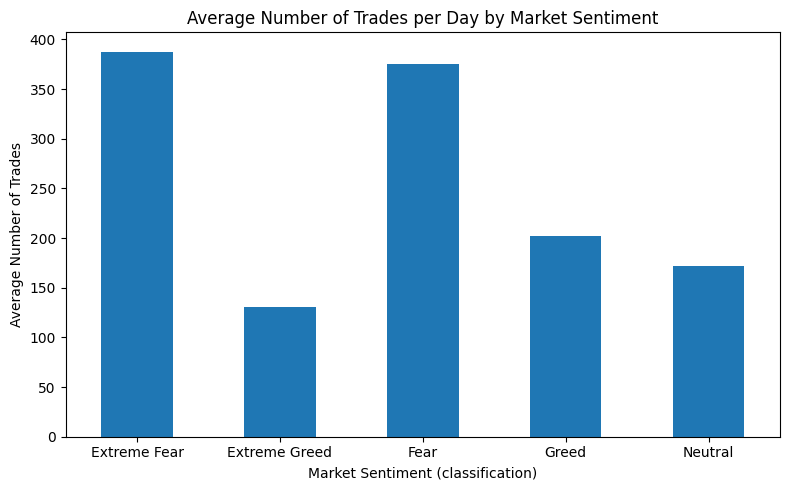

In [56]:
plt.figure(figsize=(8, 5))
summary['avg_daily_trades'].plot(kind='bar')
plt.title('Average Number of Trades per Day by Market Sentiment')
plt.xlabel('Market Sentiment (classification)')
plt.ylabel('Average Number of Trades')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('outputs/avg_daily_trades_by_sentiment.png', bbox_inches='tight')
plt.show()


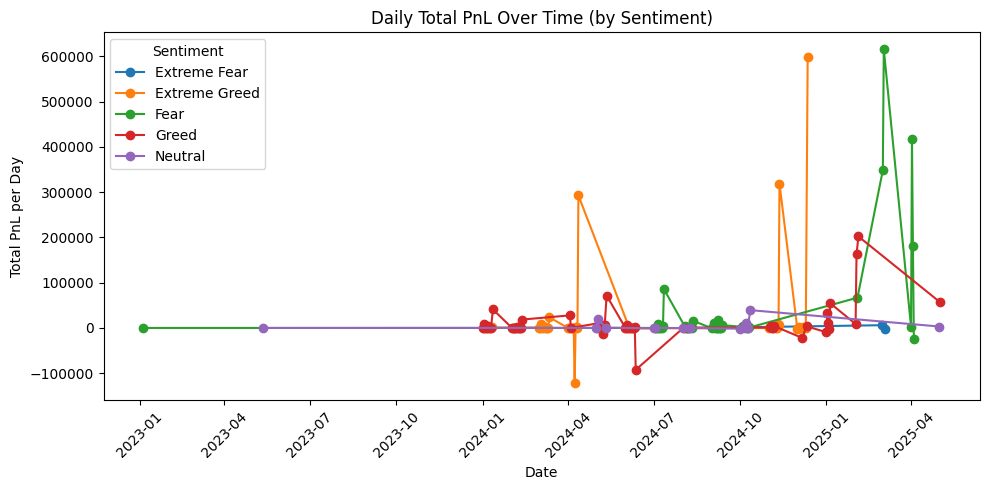

In [57]:
plt.figure(figsize=(10, 5))

for sentiment, group in daily_metrics.groupby('classification'):
    plt.plot(group['trade_date'], group['total_pnl'], marker='o', linestyle='-', label=sentiment)

plt.title('Daily Total PnL Over Time (by Sentiment)')
plt.xlabel('Date')
plt.ylabel('Total PnL per Day')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('outputs/daily_pnl_over_time_by_sentiment.png', bbox_inches='tight')
plt.show()
